## XRP Research
---
**XRP** is a *cryptocurrency* which we aim to understand and trade against. We will be the Market Participant and trade XRP whenever we identify any possible Arbritrage Opportunities.

Let's have a look at the trading data of **XRP** from May 2021 to May 2022.

In [53]:
import pandas as pd

import plotly.figure_factory as ff
import plotly.express as plt
import plotly.graph_objects as go

xrp = pd.read_csv('XRP-USD.csv')

xrp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-29,0.899495,0.939792,0.795070,0.831788,0.831788,5156278121
1,2021-05-30,0.831994,0.930127,0.799825,0.906609,0.906609,4077064725
2,2021-05-31,0.906384,1.049022,0.882556,1.046584,1.046584,6277821474
3,2021-06-01,1.042102,1.099639,0.979337,1.011001,1.011001,5606414479
4,2021-06-02,1.011214,1.049746,0.981365,1.024400,1.024400,3598008182
...,...,...,...,...,...,...,...
361,2022-05-25,0.408700,0.412966,0.396760,0.405785,0.405785,1587278448
362,2022-05-26,0.405799,0.410119,0.380723,0.393170,0.393170,2091610974
363,2022-05-27,0.393076,0.401280,0.378166,0.381787,0.381787,1927217638
364,2022-05-28,0.381732,0.386767,0.381716,0.385426,0.385426,1727544049


We simplify the `Open` and `Close` such that we can see if the price of XRP went up or down from the start till the end of the trading day

In [54]:
xrp['Direction'] = (xrp['Close'] - xrp['Open']).map(lambda x: 1 if x > 0 else -1).shift(1)
xrp.dropna(inplace=True)
xrp

,Date,Open,High,Low,Close,Adj Close,Volume,Direction
1,2021-05-30,0.831994,0.930127,0.799825,0.906609,0.906609,4077064725,-1.0
2,2021-05-31,0.906384,1.049022,0.882556,1.046584,1.046584,6277821474,1.0
3,2021-06-01,1.042102,1.099639,0.979337,1.011001,1.011001,5606414479,1.0
4,2021-06-02,1.011214,1.049746,0.981365,1.024400,1.024400,3598008182,-1.0
5,2021-06-03,1.025146,1.078275,1.008549,1.045321,1.045321,3661357809,1.0
...,...,...,...,...,...,...,...,...
361,2022-05-25,0.408700,0.412966,0.396760,0.405785,0.405785,1587278448,1.0
362,2022-05-26,0.405799,0.410119,0.380723,0.393170,0.393170,2091610974,-1.0
363,2022-05-27,0.393076,0.401280,0.378166,0.381787,0.381787,1927217638,-1.0
364,2022-05-28,0.381732,0.386767,0.381716,0.385426,0.385426,1727544049,-1.0


Lets have a deeper look at the distribution of `Open` and `Close` over the year in **36** day blocks

In [55]:
# sz = 36
# for i in range(len(xrp) - sz):
#     data = xrp.iloc[i:i+sz]
#     fig = ff.create_distplot([data['Open'], data['Close']], ['Open', 'Close'], bin_size=.02)
#     fig.write_image('images/XRP-{}.png'.format(i))


The following is the distribution movement of the `Open` and `Close` price of XRP. It can be seen that the `open` and `close` follow a similiar distribution. However, we are interested in the slight differences between these two distributions with the hopes of finding slight probabilistic arbritrage opportunities.

<img src="videos/crypto.gif" width="550" align="center">

In [56]:
# sz = 36
# for i in range(len(xrp) - sz):
#     data = xrp.iloc[i:i+sz]
#     fig = ff.create_distplot([data['Close'] - data['Open']], ['Difference'], bin_size=.02)
#     fig.write_image('images/Diff-{}.png'.format(i))

And here is the difference Distribution

<img src="videos/Diff.gif" width="550" align="center">

### Prediciting Directional Moves
---
Now that we can know distribution, lets simpligy the directional movement

In [57]:
xrp['Direction'] = (xrp['Close'] - xrp['Open']).map(lambda x: 1 if x > 0 else -1)

In [58]:
dir = xrp['Direction'].rolling(window=10).sum().dropna()
plt.line(dir)

In [59]:
up = xrp[xrp['Direction'] == 1]
down = xrp[xrp['Direction'] == -1]

### Decriptive Statistics
---

Lets look at the High / Low when for every Open / Close based upon the direction of movemment.

#### Direction: Up

In [60]:
fig = go.Figure()
fig.add_trace(go.Box(y=up['High']-up['Open'], name='High - Open'))
fig.add_trace(go.Box(y=up['High']-up['Close'], name='High - Close'))

fig.show()

In [61]:
fig = go.Figure()
fig.add_trace(go.Box(y=up['Low']-up['Open'], name='High - Open'))
fig.add_trace(go.Box(y=up['Low']-up['Close'], name='High - Close'))

fig.show()

#### Direction: Down

In [62]:
fig = go.Figure()

fig.add_trace(go.Box(y=down['High']-down['Close'], name='High - Close'))
fig.add_trace(go.Box(y=down['High']-down['Open'], name='High - Open'))

fig.show()

In [63]:
fig = go.Figure()

fig.add_trace(go.Box(y=down['Low']-down['Close'], name='Low - Close'))
fig.add_trace(go.Box(y=down['Low']-down['Open'], name='Low - Open'))

fig.show()

It appears that

array([[<AxesSubplot:title={'center':'Volume'}>]], dtype=object)

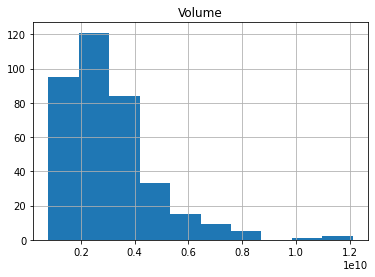

In [64]:
xrp[['Volume']].hist()

<AxesSubplot:>

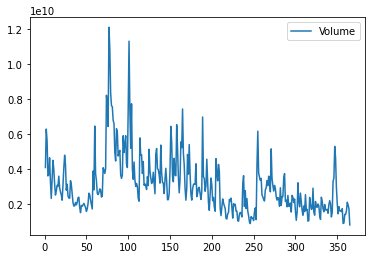

In [65]:
xrp[['Volume']].plot()

In [73]:
A = xrp['Direction']
B = A.shift(1).dropna()
A = A.iloc[1:]

2      1.0
3      1.0
4     -1.0
5      1.0
6      1.0
      ... 
361    1.0
362   -1.0
363   -1.0
364   -1.0
365    1.0
Name: Direction, Length: 364, dtype: float64

In [74]:
score = 0
for i in range(364):
    if A.iloc[i] == B.iloc[i]:
        score += 1

print(score/364)

0.4478021978021978
